<h1>UK Accident Datasets</h1>
<h2>Analyst: Janelle Kaye Borabo</h2>
<hr>

In [11]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib as plt

In [12]:
uk_accdt= pd.read_csv('datasets\\uk_accident_data.csv')

In [13]:
uk_accdt

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [14]:
uk_accdt.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [15]:
uk_accdt.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [32]:
uk_accdt['Latitude']=uk_accdt['Latitude'].fillna(uk_accdt['Latitude'].mean())
uk_accdt['Longitude']=uk_accdt['Longitude'].fillna(uk_accdt['Longitude'].mean())
uk_accdt['Road_Surface_Conditions']=uk_accdt['Road_Surface_Conditions'].fillna(uk_accdt['Road_Surface_Conditions'].mode()[0])
uk_accdt['Road_Type']=uk_accdt['Road_Type'].fillna(uk_accdt['Road_Type'].mode()[0])
uk_accdt['Urban_or_Rural_Area']=uk_accdt['Urban_or_Rural_Area'].fillna(uk_accdt['Urban_or_Rural_Area'].mode()[0])
uk_accdt['Weather_Conditions']=uk_accdt['Weather_Conditions'].fillna(uk_accdt['Weather_Conditions'].mode()[0])

# # Step 1: Convert to string only if not null
# uk_accdt['Accident Date'] = uk_accdt['Accident Date'].astype(str)
# # Step 2: Replace '/' with '-' safely
# uk_accdt['Accident Date'] = uk_accdt['Accident Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
# # Step 3: Strip whitespace
# uk_accdt['Accident Date'] = uk_accdt['Accident Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)
# # Step 4: Convert to datetime
# uk_accdt['Accident Date'] = pd.to_datetime(uk_accdt['Accident Date'], dayfirst=True, errors='coerce')

uk_accdt.dtypes

uk_accdt['Year'] = uk_accdt['Accident Date'].dt.year
uk_accdt['Month'] =  uk_accdt['Accident Date'].dt.month
uk_accdt['Day'] =  uk_accdt['Accident Date'].dt.day
uk_accdt['DayOfWeek'] =  uk_accdt['Accident Date'].dt.dayofweek
uk_accdt.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

In [33]:
uk_accdt.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

In [34]:
uk_accdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

In [35]:
uk_accdt['Index']=uk_accdt['Index'].astype('category')
uk_accdt['Accident_Severity']=uk_accdt['Accident_Severity'].astype('category')
uk_accdt['Accident Date']=uk_accdt['Accident Date'].astype('category')
uk_accdt['Light_Conditions']=uk_accdt['Light_Conditions'].astype('category')
uk_accdt['District Area']=uk_accdt['District Area'].astype('category')
uk_accdt['Road_Surface_Conditions']=uk_accdt['Road_Surface_Conditions'].astype('category')
uk_accdt['Road_Type']=uk_accdt['Road_Type'].astype('category')
uk_accdt['Urban_or_Rural_Area']=uk_accdt['Urban_or_Rural_Area'].astype('category')
uk_accdt['Weather_Conditions']=uk_accdt['Weather_Conditions'].astype('category')
uk_accdt['Vehicle_Type']=uk_accdt['Vehicle_Type'].astype('category')

In [36]:
uk_accdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  category
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  category
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District Area            660679 non-null  category
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                660679 non-null  category
 11  Urban_or_Rural_Area      660679 non-null  category
 12  Weather_Conditions       660679 non-null  category
 13  Vehicle_Type             660679 non-null  ca

<h1>Activity 2 UK Accident Questions</h1>
<hr>

<h1>1. Which type of vehicle has the most Serious accidents? </h1>

In [37]:
ser = uk_accdt[uk_accdt['Accident_Severity'] == 'Serious']

In [38]:
ser['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      66461
Van / Goods 3.5 tonnes mgw or under       4554
Motorcycle over 500cc                     3457
Bus or coach (17 or more pass seats)      3373
Goods 7.5 tonnes mgw and over             2321
Motorcycle 125cc and under                2031
Taxi/Private hire car                     1771
Motorcycle 50cc and under                 1014
Motorcycle over 125cc and up to 500cc     1014
Goods over 3.5t. and under 7.5t            857
Other vehicle                              767
Agricultural vehicle                       282
Minibus (8 - 16 passenger seats)           276
Pedal cycle                                 39
Data missing or out of range                 0
Ridden horse                                 0
Name: count, dtype: int64

<h2>Insight No.1</h2>
<h3>The car has the most number of serious accidents with 66461 accidents.</h3>

<h1>2. Which weather was the road surface has the most fatal accidents?</h1>
<hr>

In [39]:
fatal = uk_accdt[uk_accdt['Accident_Severity'] == 'Fatal']

In [40]:
weat = fatal.groupby(['Weather_Conditions','Road_Surface_Conditions']).size()

In [41]:
weat

Weather_Conditions     Road_Surface_Conditions
Fine + high winds      Dry                         103
                       Flood over 3cm. deep          1
                       Frost or ice                  3
                       Snow                          0
                       Wet or damp                  68
Fine no high winds     Dry                        5653
                       Flood over 3cm. deep          6
                       Frost or ice                125
                       Snow                         14
                       Wet or damp                1409
Fog or mist            Dry                          18
                       Flood over 3cm. deep          0
                       Frost or ice                  8
                       Snow                          0
                       Wet or damp                  56
Other                  Dry                          12
                       Flood over 3cm. deep          0
                  

<h2>Insight No.2</h2>
<h3>Fine no high winds, and Dry road surface has the most fatal accidents.</h3>

<h1>3. Is there a correlation between Number of Casualties and Number of Vehicles?</h1>
<hr>

In [42]:
uk_accdt['Number_of_Casualties'].corr(uk_accdt['Number_of_Vehicles'])

np.float64(0.2288888612692756)

<h2>Insight No.3</h2>
<h3>There is no correlation between Number of Casualties and Number of Vehicles.</h3>

<h1>4. Which year has the most accidents in the Urban Area?</h1>
<hr>|

In [43]:
urban = uk_accdt[uk_accdt['Urban_or_Rural_Area'] == 'Urban'] 

In [44]:
urban['Accident Date'].value_counts()

Accident Date
2021-11-12    456
2019-07-13    448
2021-11-13    447
2019-11-30    442
2019-12-06    442
             ... 
2021-12-25     97
2022-12-25     96
2019-12-25     94
2022-01-10     81
2020-12-25     68
Name: count, Length: 1461, dtype: int64

<h2>Insight no.4</h2>
<h3> The year 2021 had the most accidents in the Urban Area.</h3>

<h1>5. Which year has the most accidents in the Rural Area?</h1>
<hr>

In [45]:
rural = uk_accdt[uk_accdt['Urban_or_Rural_Area'] == 'Rural'] 

In [46]:
rural['Accident Date'].value_counts()

Accident Date
2021-02-11    333
2019-08-14    303
2019-01-31    277
2019-01-18    277
2019-02-01    271
             ... 
2019-12-25     63
2020-12-25     50
2022-12-25     49
2022-12-30     44
2022-01-10     42
Name: count, Length: 1461, dtype: int64

<h2>Insight no.5</h2>
<h3> The year 2021 had the most accidents in the Rural Area.</h3>

<h1>6. What is the number of Casualties	that have the fatal accident in Car type vechicle?</h1>
<hr>

In [47]:
casu = uk_accdt[(uk_accdt['Accident_Severity'] == "Fatal") & (uk_accdt['Vehicle_Type'] == 'Car')]

In [48]:
casu['Number_of_Casualties'].value_counts()

Number_of_Casualties
1     3667
2     1542
3      670
4      347
5      178
6       89
7       40
8       13
9        9
10       7
11       2
14       2
13       2
42       1
68       1
16       1
17       1
18       1
21       1
12       1
40       1
24       1
Name: count, dtype: int64

In [49]:
casu['Number_of_Casualties'].mean()

np.float64(1.8917439562110385)

<h2>Insight no.6</h2>
<h3> In the Car type vehicle, the number of casualties that have the most fatal accidents is 1 with 3367 fatal accidents.</h3>

<h1>7. Which type of vehicle has the most Slight accidents?</h1>
<hr>

In [50]:
slit = uk_accdt[uk_accdt['Accident_Severity'] == 'Slight']

In [51]:
slit['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      424954
Van / Goods 3.5 tonnes mgw or under       29139
Bus or coach (17 or more pass seats)      22180
Motorcycle over 500cc                     21861
Goods 7.5 tonnes mgw and over             14770
Motorcycle 125cc and under                13049
Taxi/Private hire car                     11368
Motorcycle over 125cc and up to 500cc      6537
Motorcycle 50cc and under                  6494
Goods over 3.5t. and under 7.5t            5172
Other vehicle                              4800
Minibus (8 - 16 passenger seats)           1671
Agricultural vehicle                       1644
Pedal cycle                                 152
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h2>Insight no.7</h2>
<h3> The car has the most number of Slight accidents with 424954 accidents.</h3>

<h1>8. Which type of vehicle has the most Fatal accidents?</h1>
<hr>

In [52]:
fatal = uk_accdt[uk_accdt['Accident_Severity'] == 'Fatal']

In [53]:
fatal['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      6577
Van / Goods 3.5 tonnes mgw or under       467
Motorcycle over 500cc                     339
Bus or coach (17 or more pass seats)      325
Goods 7.5 tonnes mgw and over             216
Motorcycle 125cc and under                189
Taxi/Private hire car                     155
Motorcycle over 125cc and up to 500cc     105
Motorcycle 50cc and under                  95
Other vehicle                              70
Goods over 3.5t. and under 7.5t            67
Minibus (8 - 16 passenger seats)           29
Agricultural vehicle                       21
Pedal cycle                                 6
Data missing or out of range                0
Ridden horse                                0
Name: count, dtype: int64

<h2>Insight no.8</h2>
<h3> The car has the most number of Fatal accidents with 6577 accidents.</h3>

<h1>9. Which District Area has the most Serious Accidents in Dry Road Surface Conditions?</h1>
<hr>

In [54]:
drt=  uk_accdt[(uk_accdt['Accident_Severity'] == 'Serious') & (uk_accdt['Road_Surface_Conditions'] == 'Dry')]

In [55]:
drt['District Area'].value_counts()

District Area
Birmingham                   1053
Leeds                         839
Westminster                   761
Bradford                      531
Liverpool                     512
                             ... 
Western Isles                  14
Clackmannanshire               13
Orkney Islands                 12
Shetland Islands                8
London Airport (Heathrow)       7
Name: count, Length: 422, dtype: int64

<h2>Insight no.9</h2>
<h3> The District Area of Birmingham has the largest number of Serious accidents in Dry Road Surface Conditions, with 1053 accidents.</h3>

<h1>10. Which District Area has the most Fatal Accidents in Wet or Damp Road Surface Conditions?</h1>
<hr>

In [56]:
frt=  uk_accdt[(uk_accdt['Accident_Severity'] == 'Fatal') & (uk_accdt['Road_Surface_Conditions'] == 'Wet or damp')]

In [57]:
frt['District Area'].value_counts()

District Area
Highland              40
Birmingham            35
Leeds                 32
Bradford              31
Aberdeenshire         27
                      ..
Clackmannanshire       0
Tamworth               0
Worthing               0
Berwick-upon-Tweed     0
Blyth Valley           0
Name: count, Length: 422, dtype: int64

<h2>Insight no.10</h2>
<h3> The District Area of Highland has the largest number of Fatal accidents in Wet or Damp Road Surface Conditions, with 40 accidents.</h3>

<h1>11. Which year has the most Slight Accidents in the District Area of Highland with Dry Road Surface Conditions?</h1>
<hr>

In [58]:
frtye=  uk_accdt[(uk_accdt['Accident_Severity'] == 'Slight') & (uk_accdt['Road_Surface_Conditions'] == 'Dry') & (uk_accdt['District Area'] == 'Highland')]

In [59]:
frtye['Accident Date'].value_counts()

Accident Date
2019-08-23    5
2020-06-04    5
2019-09-12    4
2020-07-05    4
2021-07-30    4
             ..
2022-12-01    0
2022-12-31    0
2019-01-01    0
2019-01-20    0
2019-01-19    0
Name: count, Length: 1461, dtype: int64

<h2>Insight no.11</h2>
<h3> The year 2019 had the most slight accidents in the District Area of Highland with Dry Road Surface Conditions, with 5 accidents.</h3>

<h1>12. Which year has the most Serious Accidents in the District Area of Kensington and Chelsea with Frost or ice Road Surface Conditions?</h1>
<hr>

In [60]:
srtye=  uk_accdt[(uk_accdt['Accident_Severity'] == 'Serious') & (uk_accdt['Road_Surface_Conditions'] == 'Frost or ice') & (uk_accdt['District Area'] == 'Kensington and Chelsea')]

In [61]:
srtye['Accident Date'].value_counts()

Accident Date
2021-01-05    1
2019-01-04    0
2019-01-05    0
2022-11-30    0
2019-01-21    0
             ..
2022-12-11    0
2022-12-12    0
2022-12-13    0
2022-12-14    0
2019-01-02    0
Name: count, Length: 1461, dtype: int64

<h2>Insight no.12</h2>
<h3> The year 2021 had the most serious accidents in the District Area of Kensington and Chelsea with Frost or ice Road Surface Conditions, with 1 accidents.</h3>

<h1>13. Which Light Conditions has the most Fatal Accidents using the Car type Vehicle?</h1>
<hr>

In [62]:
licar=  uk_accdt[(uk_accdt['Accident_Severity'] == 'Fatal') & (uk_accdt['Vehicle_Type'] == 'Car')]

In [63]:
licar['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       3876
Darkness - lights lit          1410
Darkness - no lighting         1200
Darkness - lighting unknown      56
Darkness - lights unlit          35
Name: count, dtype: int64

<h2>Insight no.13</h2>
<h3> The Daylight had the most number of Fatal Accidents with 3876 accidents, using Car type Vehicle?.</h3>

<h1>14. Which Light Conditions has the most Fatal Accidents using the car-type Vehicle in Urban areas?</h1>
<hr>

In [64]:
liurcar=  uk_accdt[(uk_accdt['Accident_Severity'] == 'Fatal') & (uk_accdt['Vehicle_Type'] == 'Car') & (uk_accdt['Urban_or_Rural_Area'] == 'Urban')]

In [65]:
liurcar['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       1284
Darkness - lights lit           946
Darkness - no lighting           28
Darkness - lighting unknown      20
Darkness - lights unlit          14
Name: count, dtype: int64

<h2>Insight no.14</h2>
<h3> The Daylight had the largest number of Fatal Accidents with 1284 accidents, using the Car type Vehicle in the Urban Area? </h3>

<h1>15. Which Number of Vehicles has the most Serious Accidents in Darkness light Conditions in the Birmingham District Area?</h1>
<hr>

In [66]:
dar=  uk_accdt[(uk_accdt['Accident_Severity'] == 'Serious') & (uk_accdt['District Area'] == 'Birmingham') & (uk_accdt['Light_Conditions'] == 'Darkness - no lighting')]

In [67]:
dar['Number_of_Vehicles'].value_counts()

Number_of_Vehicles
1    4
2    2
Name: count, dtype: int64

<h2>Insight no.15</h2>
<h3> In the Number of Vehicles, the 1 had the largest number of Serious Accidents in Darkness light Conditions in the Birmingham District Area, with 4 accidents. </h3>

<h1>16. Which Number of Vehicles has the most Slight Accidents in Daylight Conditions in the Bradford District Area?</h1>
<hr>

In [68]:
darli=  uk_accdt[(uk_accdt['Accident_Severity'] == 'Slight') & (uk_accdt['District Area'] == 'Bradford') & (uk_accdt['Light_Conditions'] == 'Daylight')]

In [69]:
darli['Number_of_Vehicles'].value_counts()

Number_of_Vehicles
2    2381
1    1063
3     341
4      71
5      18
6       3
7       2
8       2
Name: count, dtype: int64

<h2>Insight no.16</h2>
<h3> In the Number of Vehicles, the 2 had the largest number of Serious Accidents in Daylight Conditions in the Bradford District Area, with 2381 accidents. </h3>

<h1>17. Which Weather Conditions has the most Slight Accidents in Dry Road Surface Conditions, with only 1 Number of Casualties?</h1>
<hr>

In [70]:
waet=  uk_accdt[(uk_accdt['Accident_Severity'] == 'Slight') & (uk_accdt['Number_of_Casualties'] == 1) & (uk_accdt['Road_Surface_Conditions'] == 'Dry')]

In [71]:
waet['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       292933
Fine + high winds          3150
Other                      1907
Raining no high winds       353
Fog or mist                 305
Raining + high winds         45
Snowing no high winds        36
Snowing + high winds          2
Name: count, dtype: int64

<h2>Insight no.17</h2>
<h3> The Fine no high winds had the most Slight Accidents in Dry Road Surface Conditions, with only 1 Number of Casualties and had 292933 accidents. </h3>

<h1>18. Which Weather Conditions has the most Fatal Accidents in Snowy Road Surface Conditions in the District Area of Highland?</h1>
<hr>

In [72]:
hig=  uk_accdt[(uk_accdt['Accident_Severity'] == 'Fatal') & (uk_accdt['Road_Surface_Conditions'] == 'Snow') & (uk_accdt['District Area'] == 'Highland')]

In [73]:
hig['Weather_Conditions'].value_counts()

Weather_Conditions
Snowing no high winds    1
Fine + high winds        0
Fog or mist              0
Fine no high winds       0
Other                    0
Raining + high winds     0
Raining no high winds    0
Snowing + high winds     0
Name: count, dtype: int64

<h2>Insight no.18</h2>
<h3> The Snowing no high winds, had the most Fatal Accidents in Snowy Road Surface Conditions, with only 1 accident in the District Area of Highland. </h3>

<h1>19. Which Road Type has the most Serious Accidents in Rural Area Conditions in Van Type Vehicle?</h1>
<hr>

In [74]:
van=  uk_accdt[(uk_accdt['Accident_Severity'] == 'Serious') & (uk_accdt['Urban_or_Rural_Area'] == 'Rural') & (uk_accdt['Vehicle_Type'] == 'Van / Goods 3.5 tonnes mgw or under')]

In [75]:
van['Road_Type'].value_counts()

Road_Type
Single carriageway    1451
Dual carriageway       300
Roundabout              81
Slip road               10
One way street           4
Name: count, dtype: int64

<h2>Insight no.19</h2>
<h3> The Single carriageway had the most Serious Accidents in the Rural Area, with only 1451 accident using Van type vehicle. </h3>

<h1>20. Which Road Type has the most Fatal Accidents in Urban Area Conditions in Van Type Vehicle?</h1>
<hr>

In [76]:
vanni=  uk_accdt[(uk_accdt['Accident_Severity'] == 'Fatal') & (uk_accdt['Urban_or_Rural_Area'] == 'Urban') & (uk_accdt['Vehicle_Type'] == 'Van / Goods 3.5 tonnes mgw or under')]

In [77]:
vanni['Road_Type'].value_counts()

Road_Type
Single carriageway    114
Dual carriageway       36
Roundabout              6
One way street          3
Slip road               2
Name: count, dtype: int64

<h2>Insight no.20</h2>
<h3> The Single carriageway had the most Fatal Accidents in the Urban Area, with only 114 accident using Van type vehicle. </h3>

In [78]:
uk_accdt["Accident Date"] = pd.to_datetime(uk_accdt["Accident Date"], dayfirst=True, errors="coerce")
import matplotlib.pyplot as plt



<h1>21. Are accidents increasing or decreasing over the years?</h1>

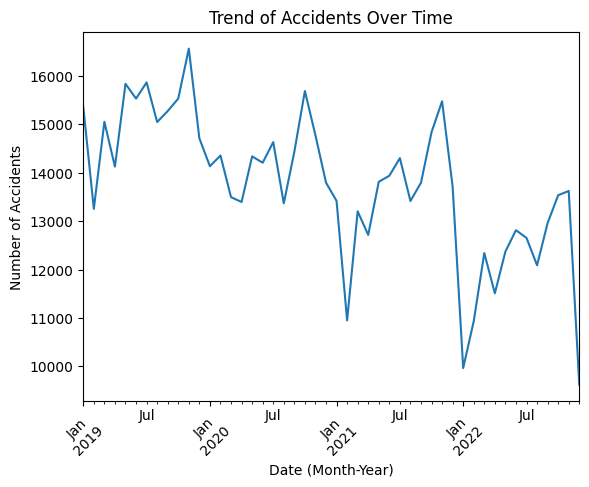

In [79]:
uk_accdt["Accident Date"] = pd.to_datetime(uk_accdt["Accident Date"], dayfirst=True, errors="coerce")
uk_accdt.groupby(uk_accdt["Accident Date"].dt.to_period("M")).size().plot()
plt.title("Trend of Accidents Over Time")
plt.xlabel("Date (Month-Year)")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

<H1>Insights shows yes but sometimes suddenly spikes</H1>

<h1>22.Do serious accidents result in more casualties on average?</h1>

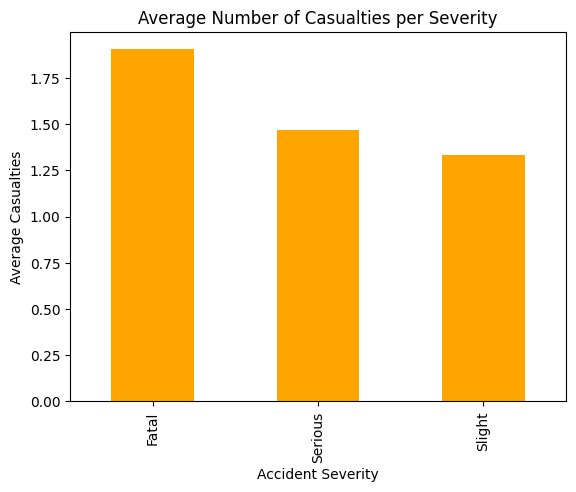

In [80]:
# 2. Casualties per Accident Severity
uk_accdt.groupby("Accident_Severity")["Number_of_Casualties"].mean().plot(kind="bar", color="orange")
plt.title("Average Number of Casualties per Severity")
plt.ylabel("Average Casualties")
plt.xlabel("Accident Severity")
plt.show()


<h1>insights shows yes!</h1>

<h1>23. Are accidents more common in daylight or darkness?</h1>

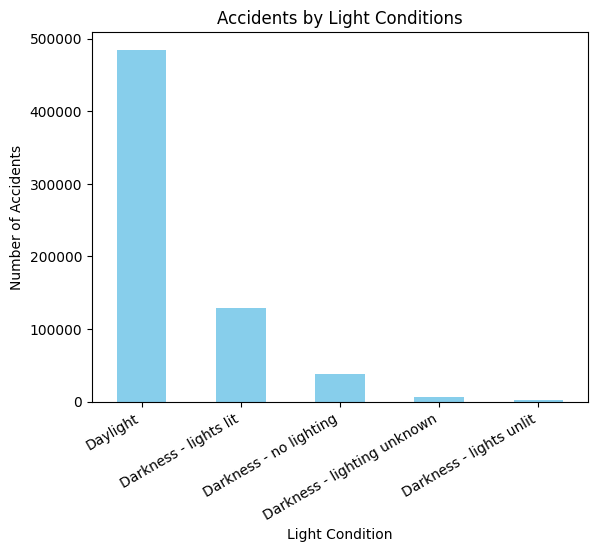

In [81]:
uk_accdt["Light_Conditions"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Accidents by Light Conditions")
plt.ylabel("Number of Accidents")
plt.xlabel("Light Condition")
plt.xticks(rotation=30, ha="right")
plt.show()

<h1>Insights shows how dominant daylight accident is</h1>

<h1>24.Do hazardous conditions lead to more accidents?</h1>

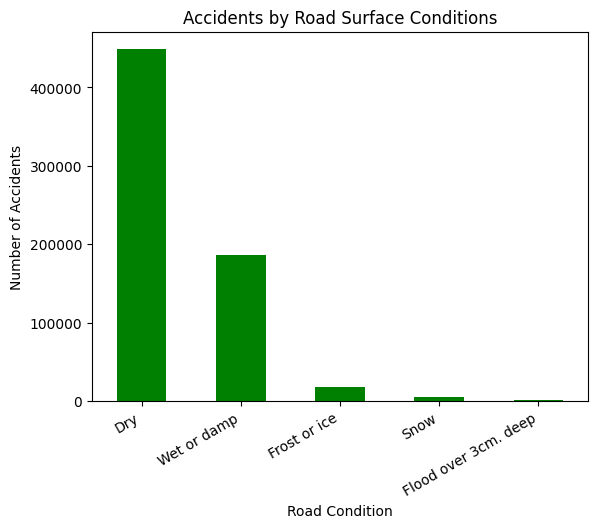

In [82]:
uk_accdt["Road_Surface_Conditions"].value_counts().plot(kind="bar", color="green")
plt.title("Accidents by Road Surface Conditions")
plt.ylabel("Number of Accidents")
plt.xlabel("Road Condition")
plt.xticks(rotation=30, ha="right")
plt.show()

<h1>Insights surprisingly shows no</h1>

<h1>25. Which district has the most accident?</h1>

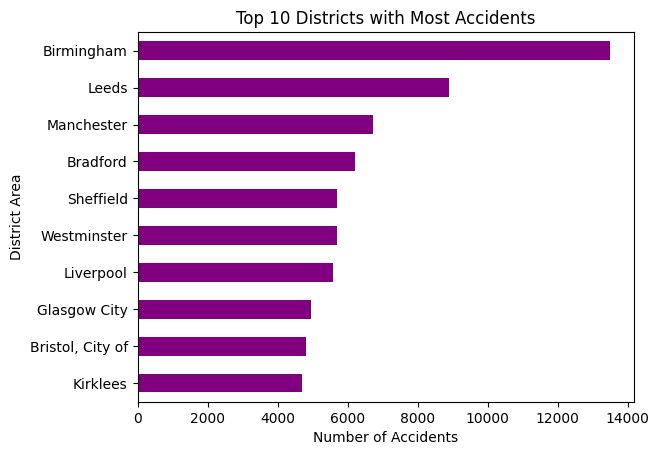

In [83]:
uk_accdt["District Area"].value_counts().head(10).plot(kind="barh", color="purple")
plt.title("Top 10 Districts with Most Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("District Area")
plt.gca().invert_yaxis()
plt.show()

<h1>Insights shows that birminghan has the most accidnet</h1>

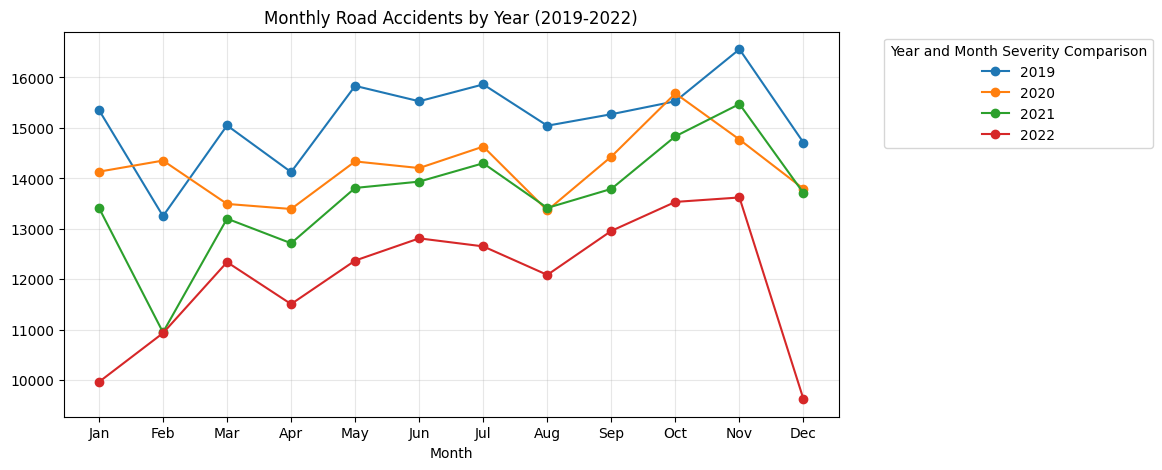

In [84]:
import matplotlib.pyplot as plt

monthly_data = uk_accdt.groupby(['Year', 'Month']).size()
monthly_data = monthly_data.unstack(level=0)
monthly_data.plot(marker='o', figsize=(10, 5),title='Monthly Road Accidents by Year (2019-2022)')
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Severity Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h1>Insight no.26</h1>
<h2>Accidents are more common in December (except for 2022). In 2019, 2020, and 2021, the number of accidents reached the highest level of the year in December.</h2>
<hr>

<h1>Insight no.27</h1>
<h2>In 2022, the number of accidents was mostly lower than in previous years. Throughout nearly every month, accident counts were below those of 2019 to 2021. This may mean there were fewer vehicles on the road.</h2>
<hr>

<h1>Insight no.28</h1>
<h2>In 2019, there were more road accidents than in any other year. The data shows that the number of accidents in 2019 was consistently higher than in 2020, 2021, and 2022. This means that 2019 had the most road accidents each month compared to those years.</h2>
<hr>

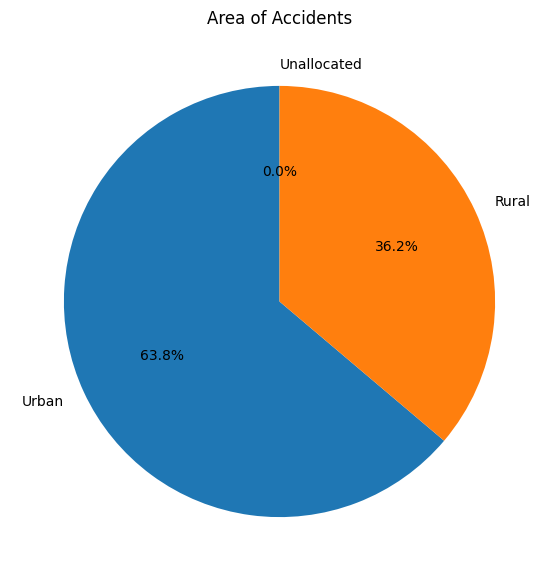

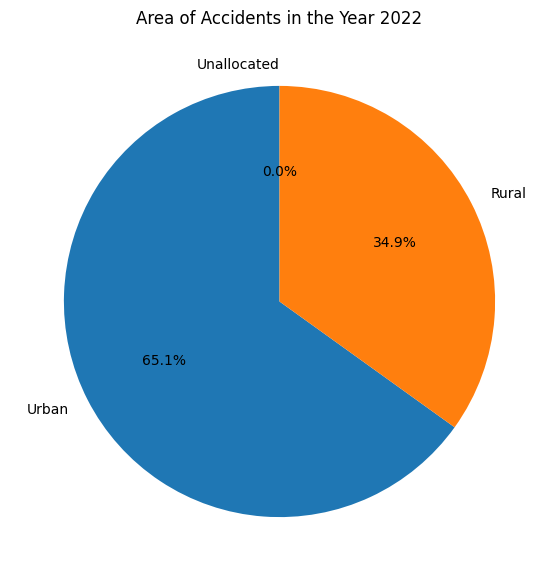

In [85]:
area = uk_accdt['Urban_or_Rural_Area'].value_counts()

plt.pie(area,
        labels = area.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Area of Accidents')
plt.show()

year2022 = uk_accdt[uk_accdt['Year'] == 2022]
year2022
ny2022 = year2022['Urban_or_Rural_Area'].value_counts()

plt.pie(ny2022,
        labels = ny2022.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Area of Accidents in the Year 2022')
plt.show()

<h1>Insight no.29</h1>
<h2>Most accidents happen in urban areas. Over the years, about 64–65% of accidents have occurred in cities. This shows that busier city roads have more accidents than rural roads.</h2>
<hr>

<h1>Insight no.30</h1>
<h2>Around 35–36% of accidents occur in rural areas. While this is less than in cities, it still shows that road safety in rural areas is important.</h2>
<hr>

<h1>Insight no.31</h1>
<h2>In 2022, urban accidents went up slightly, rising from 63.8% to 65.1% of all accidents, showing more accidents happening in cities. Meanwhile, rural accidents decreased from 36.2% to 34.9%, which may mean that rural roads are safer or that more traffic is moving to urban areas.</h2>
<hr>

<H1>Geospatial</H1>
<hr>

In [86]:
for i in uk_accdt['District Area'].unique():
    print(i)


Kensington and Chelsea
Westminster
Richmond upon Thames
Hammersmith and Fulham
Hounslow
Tower Hamlets
City of London
Southwark
Camden
Hackney
Islington
Barnet
Brent
Haringey
Merton
Ealing
Enfield
Greenwich
Newham
London Airport (Heathrow)
Hillingdon
Waltham Forest
Redbridge
Barking and Dagenham
Bromley
Havering
Croydon
Lambeth
Wandsworth
Sutton
Bexley
Lewisham
Harrow
Kingston upon Thames
Barrow-in-Furness
South Lakeland
Carlisle
Eden
Allerdale
Copeland
Fylde
Blackpool
Wyre
Lancaster
Chorley
West Lancashire
South Ribble
Preston
Blackburn with Darwen
Hyndburn
Ribble Valley
Burnley
Pendle
Rossendale
Wirral
Liverpool
Sefton
Knowsley
St. Helens
Manchester
Salford
Tameside
Stockport
Bolton
Wigan
Trafford
Bury
Rochdale
Oldham
Chester
Vale Royal
Halton
Warrington
Crewe and ntwich
Ellesmere Port and Neston
Congleton
Macclesfield
Crewe and Nantwich
Blyth Valley
Sunderland
Gateshead
North Tyneside
Tynedale
Berwick-upon-Tweed
Newcastle upon Tyne
Castle Morpeth
South Tyneside
Wansbeck
Alnwick
Wear 

In [87]:
Bradford = uk_accdt[uk_accdt['District Area'] == 'Bradford']
Manchester = uk_accdt[uk_accdt['District Area'] == 'Manchester']
Birmingham = uk_accdt[uk_accdt['District Area'] == 'Birmingham']
Sheffield = uk_accdt[uk_accdt['District Area'] == 'Sheffield']
Hackney = uk_accdt[uk_accdt['District Area'] == 'Hackney']
Copeland = uk_accdt[uk_accdt['District Area'] == 'Copeland']

In [94]:
import folium
from folium.plugins import HeatMap

locations = list(zip(Bradford['Latitude'], Bradford ['Longitude']))
ma = folium.Map(location =[Bradford['Latitude'].mean(), Bradford ['Longitude'].mean()],zoom_start = 10 )
HeatMap(locations).add_to(ma)
ma.save('Bradford_accident_heatmap.html')
ma

<h1>Insight no.32</h1>
<h2>In the area of Bradford, there are a lot of accidents happening in cities, especially in areas where people walk and cars drive. This is especially true in mixed-use neighborhoods where both activities meet.</h2>
<hr>

In [96]:
import folium
from folium.plugins import HeatMap

locations = list(zip(Manchester['Latitude'], Manchester ['Longitude']))
ma1 = folium.Map(location =[Manchester['Latitude'].mean(), Manchester ['Longitude'].mean()],zoom_start = 10 )
HeatMap(locations).add_to(ma1)
ma1.save('Manchester_accident_heatmap.html')
ma1

<h1>Insight no.33</h1>
<h2>In the area of Manchester, most accidents happen on busy main roads and ring roads. It can be a reason for many cars in those areas.</h2>
<hr>

In [95]:
import folium
from folium.plugins import HeatMap

locations = list(zip(Birmingham['Latitude'], Birmingham ['Longitude']))
ma2 = folium.Map(location =[Birmingham['Latitude'].mean(), Birmingham ['Longitude'].mean()],zoom_start = 10 )
HeatMap(locations).add_to(ma2)
ma2.save('Birmingham_accident_heatmap.html')
ma2

<h1>Insight no.34</h1>
<h2>In the area of Birmingham experiences the most accidents near in the city center and on busy main roads, showing that the heavy traffic can increase driving risks.</h2>
<hr>

In [99]:
import folium
from folium.plugins import HeatMap

locations = list(zip(Sheffield['Latitude'], Sheffield ['Longitude']))
ma3 = folium.Map(location =[Sheffield['Latitude'].mean(), Sheffield ['Longitude'].mean()],zoom_start = 10 )
HeatMap(locations).add_to(ma3)
ma3.save('Sheffield_accident_heatmap.html')
ma3

<h1>Insight no.35</h1>
<h2>In the area of Sheffield, there are more accidents near the city center and on the hills. Also, in the crossing roads this seems to happen because of the busy roads where accident always occurs.</h2>
<hr>

In [100]:

import folium
from folium.plugins import HeatMap

locations = list(zip(Hackney['Latitude'], Hackney ['Longitude']))
ma4 = folium.Map(location =[Hackney['Latitude'].mean(), Hackney ['Longitude'].mean()],zoom_start = 10 )
HeatMap(locations).add_to(ma4)
ma4.save('Hackney_accident_heatmap.html')
ma4

<h1>Insight no.36</h1>
<h2>In the area of Hackney, the map shows a lot of accidents near crossroads and busy streets, where traffic and people often meet.</h2>
<hr>

In [101]:
import folium
from folium.plugins import HeatMap

locations = list(zip(Copeland['Latitude'], Copeland ['Longitude']))
ma5 = folium.Map(location =[Copeland['Latitude'].mean(), Copeland ['Longitude'].mean()],zoom_start = 10 )
HeatMap(locations).add_to(ma5)
ma5.save('Copeland_accident_heatmap.html')
ma5

<h1>Insight no.37</h1>
<h2>In the area of Copeland, we can see accidents are very wide, also with any in on coastal and country roads,  meaning narrow and curvy roads may cause problems.</h2>
<hr>